In [14]:
import seaborn as sns

In [2]:
print (seaborn.__version__)

0.9.0


In [3]:
import numpy as np
from sklearn import preprocessing

# create some sample data and add the line to this file:
input_data = np.array([[3, -1.5, 3, -6.4], [0, 3, -1.3, 4.1], [1, 2.3, -2.9, -4.3]])


In [4]:
input_data

array([[ 3. , -1.5,  3. , -6.4],
       [ 0. ,  3. , -1.3,  4.1],
       [ 1. ,  2.3, -2.9, -4.3]])

In [5]:
data_standardized = preprocessing.scale(input_data)
print ("\nMean = ", data_standardized.mean(axis = 0))
print ("Std deviation = ", data_standardized.std(axis = 0))


Mean =  [ 5.55111512e-17 -3.70074342e-17  0.00000000e+00 -1.85037171e-17]
Std deviation =  [1. 1. 1. 1.]


In [6]:
sum(input_data)

array([ 4. ,  3.8, -1.2, -6.6])

In [7]:
data_standardized

array([[ 1.33630621, -1.39936232,  1.36473933, -0.9258201 ],
       [-1.06904497,  0.87670892, -0.36125453,  1.38873015],
       [-0.26726124,  0.5226534 , -1.0034848 , -0.46291005]])

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
from subprocess import check_output

In [5]:
datapath = "/Users/etuka/OneDrive - Norwich BioScience Institutes/test_data/ml"

In [6]:
data = pd.read_csv(datapath+"/data2.csv")

In [7]:
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [8]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [9]:
plt.style.use('ggplot')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [11]:
data.shape

(310, 7)

In [12]:
data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


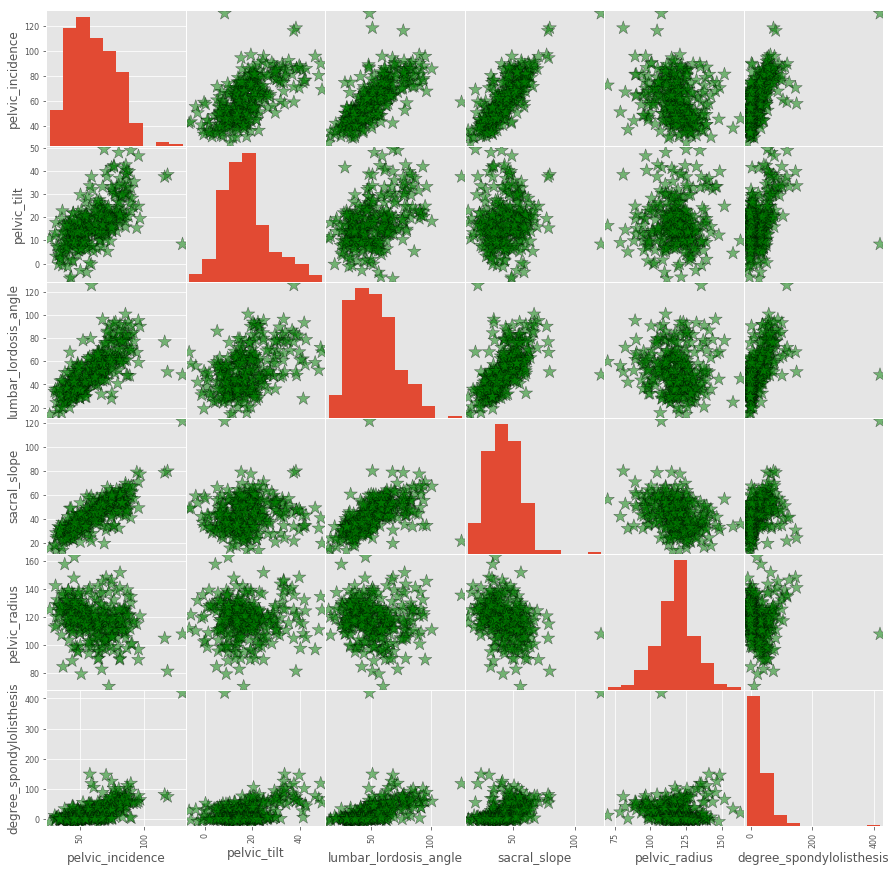

In [13]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()


Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

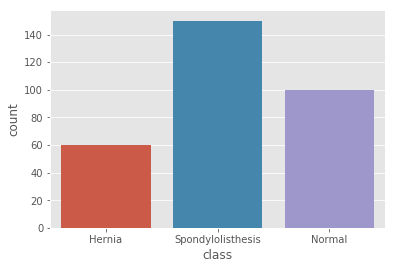

In [15]:
sns.countplot(x="class", data=data)
data.loc[:,'class'].value_counts()

In [17]:
data['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: ['Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Normal' 'Normal' 'Hernia'
 'Normal' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Normal' 'Normal' 'Normal' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Normal' 'Hernia'
 'Normal' 'Normal' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Normal' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Hernia' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthe

In [19]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
input_classes = ['suzuki', 'ford', 'suzuki', 'toyota', 'ford', 'bmw']
label_encoder.fit(input_classes)
print("\nClass mapping:")
for i, item in enumerate(label_encoder.classes_):
    print(item, '-->', i)


Class mapping:
bmw --> 0
ford --> 1
suzuki --> 2
toyota --> 3


In [22]:
import numpy
print(numpy.__version__)

import matplotlib
print(matplotlib.__version__)

import pandas
print(pandas.__version__)


import seaborn
print(seaborn.__version__)

1.15.4
3.0.2
0.23.4
0.9.0
